# **Week 14: Introduction to Modelling**

Please refer to the textbook: "Python for Data Analysis" by Wes McKinney for details of this topic on Chapter 12




# **14.1 Interfacing Between pandas and Model Code**

In [ ]:
# start by importing NumPy and pandas
import numpy as np
import pandas as pd

***Turn a DataFrame into a NumPy array***
- we want the data set in array format
- in matrices format

In [ ]:
# Pandas DataFrame
# Numerical dataset
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [ ]:
# Get the data column names
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [ ]:
# Turn the dataframe into NumPy array
# in matrices  format
data.to_numpy()

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [ ]:
# Extract a subset of the columns - using loc() function
# Convert into numpy array
model_cols = ['x0', 'x1']
data.loc[:, model_cols].to_numpy()

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [ ]:
# Another dataset -> categorical value
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                  categories=['a', 'b'])
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


### When we deal with **mixture of numerical and categorical** data type
- we will try to **transform the categorical data** into sort of **'numerical'** format
- one-hot encoding, turn binary values etc...

In [ ]:
# Create dummy dataframe based on categorical value
# Focusing on the 'category' variable
dummies = pd.get_dummies(data.category, prefix='category')
dummies

,category_a,category_b
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True


In [ ]:
# Convert and join with transformed categorical dataset
# axis=1 -> refers to the column wise / going down the rows
data_with_dummies = data.drop('category', axis=1).join(dummies)
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,True,False
1,2,-0.01,0.0,False,True
2,3,0.25,3.6,True,False
3,4,-4.10,1.3,True,False
4,5,0.00,-2.0,False,True


# **14.2 Creating Model Descriptions with Patsy**


1.   Patsy -> Python library for describing statistical models (especially linear models)
2.   special string syntax: ***y ~ x0 + x1***
3. describe the relationship between a ***response variable (y)*** and ***oneor more covariates or features (in this case, x0 and x1)***.
    * covariates -> other terms: **independent variable, predictors**
    * covariates -> co + variables -> x0, x1, ... xn
    * the ***variable y*** is ***modeled by a linear combination*** of the ***variables x0 and x1***.
    * e.g. ***Weight*** is modeled by a ***linear combination*** of the ***Age and Gender***
    * `+` -> the plus sign does mean it is summation
        - **it just means 'inclusion'**




In [ ]:
# Import patsy library
import patsy

In [ ]:
# Example data
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


### **Patsy formula syntax**


*   `y ~ x0 + x1`
    *   `y` represents the dependent variable (**the 'response' variable**).
    *   `x0` and `x1` are independent variables (**the 'predictors/covariate' variable**).
    *   `~` separates the response and covariate variables.
    *   `+` indicates the **inclusion of multiple independent covariate variables** in the model




In [ ]:
# Create the design matrix
# dmatrices -> design matrix
# `+` indicates the inclusion of multiple independent variables in the model
y, X = patsy.dmatrices('y ~ x0 + x1', data)

In [ ]:
# Running this code will produce two outputs
patsy.dmatrices('y ~ x0 + x1', data)

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 3)
   Intercept  x0     x1
           1   1   0.01
           1   2  -0.01
           1   3   0.25
           1   4  -4.10
           1   5   0.00
   Terms:
     'Intercept' (column 0)
     'x0' (column 1)
     'x1' (column 2))

In [ ]:
# Get the y data
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [ ]:
# Get X data
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [ ]:
# Convert y to numpy array
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [ ]:
# Convert X to numpy array
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

### **Intercept term**
* An **intercept** is a **constant value** that's added to the model (it's often included by default in statistical models).
* **Intercept term** represents the ***value of the response variable (i.e. y variable)*** when all ***covariates (x0, x1, ...) are zero***
* In certain situation, ***omitting the intercept term might make sense***
    * Imagine we are studying a chemical reaction, and we are trying to **model the yield of a product (the response, *y*)** based on the amounts of two reactants, A and B ***(the covariates, x0, x1)***
        * ***a reaction with zero amounts of both A and B might reasonably be expected to produce zero yield.***
* we are baking cake using two ingredients, A & B
    - it would only make sense, there shouldn't be any cake produced (i.e.default value), if ingredient A & B is not being used
    - in this case, intercept term should be 0

In [ ]:
# Suppress the intercept term - cake baking experiment
# we can add in the constant 0 to supress the intercept term
# [1] -> represent the x matrice
# [0] -> represent the y matrice
patsy.dmatrices('y ~ x0 + x1 + 0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

### **linear regression**
* we want to understand the relationship between two variable -> y and x
* using the **<font color='red'>ordinary least squares method**</font> -> very close to 0
* `numpy.linalg.lstsq` -> **numpy linear algebra least squares**

In [ ]:
# Display X
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [ ]:
# Display y
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [ ]:
# Perform ordinary least squares regression
# using numpy.linalg.lstsq
# rcond=None -> letting the function automatically handle the sensitivity or stability of the matrix computations
# reciprocal condition number is used to express how well-conditioned a problem is,
# where a higher value indicates better conditioning
#"_" -> used as a convention to represent variables that we're not explicitly interested in or not using
# np.linalg.lstsq(X, y, rcond=None) -> will generate 4 outputs
coef, resid, _, _ = np.linalg.lstsq(X, y, rcond=None)

In [ ]:
# Output the four elements
np.linalg.lstsq(X, y, rcond=None)

(array([[ 0.31290976],
        [-0.07910564],
        [-0.26546384]]),
 array([19.63791494]),
 3,
 array([8.03737688, 3.38335321, 0.90895207]))

In [ ]:
# Get the coefficient values
coef

array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [ ]:
# Reattach the model column names to the fitted coefficients to obtain a Series
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)
coef

,0
Intercept,0.312910
x0,-0.079106
x1,-0.265464


### **What does the values above mean?**
* We have the linear regression formula
* The function of y in relation to x is as follows:

    - `y = 0.313 - 0.079x0 - 0.265x1`

 Explanation:
 one unit change of x0, y will decrease by 0.079
 one unit change of x1, y will decrease by 0.265

In [ ]:
X.design_info

DesignInfo(['Intercept', 'x0', 'x1'],
           factor_infos={EvalFactor('x0'): FactorInfo(factor=EvalFactor('x0'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1),
                         EvalFactor('x1'): FactorInfo(factor=EvalFactor('x1'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(factors=(),
                                                   contrast_matrices={},
                                                   num_columns=1)]),
                                     (Term([EvalFactor('x0')]),
                                      [SubtermInfo(factors=(EvalFactor('x0'),),
                                                   contrast_matrices={},
     

### ***Residual***
1. residuals are the ***differences between the actual observed values*** of the ***response variable*** and the ***values predicted by the linear model***
2. Each data point has a residual, which is the ***vertical distance*** ***between the observed point and the point predicted by the model***.
3. ***Small Residuals***
    * When the ***sum of squared residuals is small***, it suggests that the ***model does a good job of explaining the variation in the data***
    * the predicted values are very close to the actual observed values
    * A smaller sum of squared residuals indicates a better fit of the model to the data
4. ***Large Residuals***
    * a l***arge sum of squared residuals suggests that the model does not fit the data well***
    * The predicted values deviate significantly from the actual observed values
    * Larger residuals indicate that the ***model is not capturing some of the variability*** in the data, and there may be room for improvement.

In [ ]:
# Residual value
pd.Series(resid, name = "Residuals")

,Residuals
0,19.637915


### In our case here, we don't have a baseline value
- unless we make another model, with another dataset
- if the second dataset, residual = 5.3
- if the third datset, residual = 0.5
* then we can come to conclusion, saying that model 3 is the best model in this case

In [ ]:
# Model metadata is retained in the design_info attribute
X.design_info

DesignInfo(['Intercept', 'x0', 'x1'],
           factor_infos={EvalFactor('x0'): FactorInfo(factor=EvalFactor('x0'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1),
                         EvalFactor('x1'): FactorInfo(factor=EvalFactor('x1'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(factors=(),
                                                   contrast_matrices={},
                                                   num_columns=1)]),
                                     (Term([EvalFactor('x0')]),
                                      [SubtermInfo(factors=(EvalFactor('x0'),),
                                                   contrast_matrices={},
     

#### **Data Transformations in Patsy Formulas**

In [ ]:
# Display the data content
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


### Why data transformation is important
1. New drug Score for Clinical trial A is 90 marks
2. New drug Score for Clinical trial B is 9 marks

* real situation (normalize):
    - full marks for Bernard's is 100 marks -> Bernard is 0.9
    - full marks for hhathim's is 9 marks -> Hathim is 1.0


### transformation of data does not mean we manipulate the data
* it just means we change the 'scale', or 'the look' of the data
* in actual case, they are still the same

In [ ]:
# Display the data content
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [ ]:
np.log(np.abs(0.01) + 1)

0.009950330853168092

In [ ]:
# Mixing Python code into Patsy formulas
# ln - natural logarithm
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

### **`standardize`**: transforms a variable by subtracting its mean and dividing by its standard deviation.


### **`center`**: transforms a variable by subtracting its mean.
- the center here is equals to 0

vals = 1, 2, 3, 4, 5

mean od vals = 3

vals_trans = -2, -1, 0, 1, 2

mean of vals_trans = 0


In [ ]:
# Variable transformations
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

### **Fitting a model on one dataset**
* then evaluate the model based on another dataset

In [ ]:
# Original content for X
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [ ]:
# Create a new data
new_data = pd.DataFrame({
    'x0': [6, 7, 8, 9],
    'x1': [3.1, -0.5, 0, 2.3],
    'y': [1, 2, 3, 4]})
new_data

,x0,x1,y
0,6,3.1,1
1,7,-0.5,2
2,8,0.0,3
3,9,2.3,4


In [ ]:
# Transformations to new out-of-sample data
# used to apply the same transformations that were used to prepare the training data to a new dataset
new_X = patsy.build_design_matrices([X.design_info], new_data)
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [ ]:
# Display content for X
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [ ]:
# Display content for x
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


### We mention that
- `+` -> refers to inclusion of multiple variables
- so what if we die die want to do summation
- can we make it work?

In [ ]:
# The plus symbol (+) in the context of Patsy formulas does not mean addition
# It means inclusion of multiple covariates
# To add columns explicitly from a dataset by name, we must wrap them in the special I() function
y, X = patsy.dmatrices('y ~ I(x0 + x1)', data)
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

#### **Categorical Data and Patsy**

1.   When using ***nonnumeric terms*** (***Categorical Data***) in a Patsy formula, they are converted to dummy variables by default



In [ ]:
# Example Categorical Dataframe
data = pd.DataFrame({
    'key1': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
    'key2': [0, 1, 0, 1, 0, 1, 0, 0],
    'v1':[1,2,3,4,5,6,7,8],
    'v2': [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
})
data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,b,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


In [ ]:
# Building the design matrices with categorical data
# term key1[T.b] -> for key1, we are interested with the term b, using term a as baseline
y, X = patsy.dmatrices('v2 ~ key1', data)
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [ ]:
# Omit intercept
# One of the levels will be left out to avoid collinearity
# Often referred to as the "reference level" or "baseline level"
y, X = patsy.dmatrices('v2 ~ key1 + 0', data)
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [ ]:
# Display content for data
data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,b,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


In [ ]:
# Numeric columns can be interpreted as categorical with the C function
y, X = patsy.dmatrices('v2 ~ C(key2)', data)
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [ ]:
# Data with multiple categorical terms
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [ ]:
# Creating the Design Matrices
# key1[T.b] -> Term for b: indicates the presence of category "b" in the "key1" variable
y, X = patsy.dmatrices('v2 ~ key1 + key2', data)
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [ ]:
# another example with multiple categorical terms
# 'key1:key2' -> interaction between key1 and key2
# key1:key2 -> gender:exercise(intense, mild)
# allows the model to capture the combined effect of both key1 and key2 on the response variable y
# cannot explained by considering key1 and key2 separately
y, X = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data)
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

# **14.3 Introduction to statsmodels**
statsmodels is a Python library for ***fitting*** many kinds of ***statistical models***, performing statistical tests, and data exploration and visualization.

#### **Estimating Linear Models**

In [ ]:
# Load statsmodels module
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Generate a linear model using some random data
# dnorm generate normally distributed data with a particular mean and variance
rng = np.random.default_rng(seed=12345)

def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * rng.standard_normal(*size)
N=100
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]

y = np.dot(X, beta) + eps

In [ ]:
# Display content for X
X

array([[-9.00506021e-01, -1.89429577e-01, -1.02787020e+00],
       [ 7.99252054e-01, -1.54598388e+00, -3.27397080e-01],
       [-5.50654833e-01, -1.20254287e-01,  3.29358994e-01],
       [-1.63915546e-01,  8.24039852e-01,  2.08274848e-01],
       [-4.76512913e-02, -2.13146980e-01, -4.82436357e-02],
       [-4.68576597e-01, -1.43558784e+00, -1.52694953e-01],
       [-8.65068061e-01, -9.63148432e-02,  7.08625055e-01],
       [ 4.10395842e-01,  6.08038650e-01,  1.26222105e-01],
       [ 2.28353201e-01,  1.56467440e-01,  4.06761512e-01],
       [-1.23509905e+00, -3.31585038e-01,  1.76681376e-01],
       [ 1.48463222e+00,  1.43167842e+00, -2.99354280e-01],
       [ 6.12531226e-01,  1.47169718e+00,  6.95582154e-01],
       [-4.80278623e-01, -7.62397041e-02, -5.53712608e-01],
       [ 5.70600290e-01,  6.30092128e-01, -5.34945034e-01],
       [-2.95327118e-01,  3.04024846e-01, -1.91921494e-01],
       [-3.83834219e-02,  6.05303068e-01, -3.26313824e-01],
       [ 4.98908970e-01,  1.12569928e+00

In [ ]:
# Top five for X
X[:5]

array([[-0.90050602, -0.18942958, -1.0278702 ],
       [ 0.79925205, -1.54598388, -0.32739708],
       [-0.55065483, -0.12025429,  0.32935899],
       [-0.16391555,  0.82403985,  0.20827485],
       [-0.04765129, -0.21314698, -0.04824364]])

In [ ]:
# Top five for y
y[:5]

array([-0.59952668, -0.58845445,  0.18563386, -0.00747657, -0.01537445])

In [ ]:
# sm.add_constant function can add an intercept column to an existing matrix
X_model = sm.add_constant(X)

In [ ]:
X_model[:5]

array([[ 1.        , -0.90050602, -0.18942958, -1.0278702 ],
       [ 1.        ,  0.79925205, -1.54598388, -0.32739708],
       [ 1.        , -0.55065483, -0.12025429,  0.32935899],
       [ 1.        , -0.16391555,  0.82403985,  0.20827485],
       [ 1.        , -0.04765129, -0.21314698, -0.04824364]])

In [ ]:
# sm.OLS class can fit an ordinary least squares linear regression
# predict the variable y using the information in the matrix X
# model -> this is generated using training data -> machine learning term
# the y and X should be in matrices format; numpy array
model = sm.OLS(y, X)

### We have two typical terms when dealing with machine learning cases
1. model -> say for example, zuhair wants to make a custom-made blazer
     - get a tailor to measure his height, waist line, arm length, shoulder width etc....
2. fit -> after the tailor get all the information, he is going to make the blazer that is fitted to Zuhair in this case

So:
* model -> dataset (height, waist line, arm length, shoulder width)
*fit -> training done on the model ('the process' to fit the dataset)


### ***The fit() method***
1. **Creating a Model:**
    
    * Before using the fit() method, we create a model object.
    
2. **Training the Model:**
    
    * Once we have the model, it needs to learn from the data.
    * ***model.fit()*** -> we're telling the model to "learn" from the data we provide.

3. **Providing Data:**

    * The ***fit() method*** takes our input data, which includes both the ***features (covariates)*** and the ***target variable (response variable)***.
    * The model uses these data to ***adjust its internal parameters or coefficients***.

4. **Adjusting Parameters:**

    * During the training process, the model adjusts its parameters or coefficients to ***minimize the difference*** between its predictions and the actual target values in the training data.

5. **Resulting Trained Model:**

    * After the fit() method completes, we have a ***trained model***.
    * The model has ***learned patterns or relationships in the training data*** and is ready to make predictions or provide insights.

In [ ]:
# Model’s fit method returns a regression results object
# containing estimated model parameters and other diagnostics
# params -> get the coefficient data
results = model.fit()
results.params

array([0.06681503, 0.26803235, 0.45052319])

### **The model that we built**
- `y ~ 0.067x0 + 0.268x1 + 0.451x2`
- x0 -> ketinggian (parameter/coefficient: 0.067)
- x1 -> waist line (parameter/coefficient: 0.268)
- x2 -> shoulder width (parameter/coefficient: 0.451)

* parameter: what is the effect (response) on y given there is a change in x
    - parameter is like a middle man between y and x

### Increase covariates
- but we need to be careful; because as we add in more covariate, we are also adding in more noise
- Analogy:
    - Sit 1: Asmaa work on **Project 2 alone** -> she created a brilliant project
    - Sit 2: Asmaa work on **Project 2 with Hashwineey** -> both created an even more brilliant projects -> because ada dua brains
    - Sit 3: Asmaa work on **Project 2 with Hashwineey, Zuhair, Luqman, Hathim, Farhana ** -> They created the best project ever -> because ada all the best brains inthe world
        -> but semua a perangai sendiri
            - some said wanna online
            - some said tak nak online
            - some said tak dapat bangun pagi
            - some said tak ade kereta
- **penalise the noise** as the model becomes complicated -> the term **`adjusted`**



In [ ]:
# Summary method on results can print a model detailing
# diagnostic output of the model
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.469
Model:                            OLS   Adj. R-squared (uncentered):              0.452
Method:                 Least Squares   F-statistic:                              28.51
Date:                Sat, 18 Jan 2025   Prob (F-statistic):                    2.66e-13
Time:                        08:31:20   Log-Likelihood:                         -25.611
No. Observations:                 100   AIC:                                      57.22
Df Residuals:                      97   BIC:                                      65.04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### ***Digest the OLS output***

# ***Model Fit:***
1. ***R-squared (uncentered): 0.469*** -> proportion of the variance in the response **variable** explained by the covariates; 46.9% of the variance is explained.
    - the **remianing 53.1% cannot be explained by the current model**
    - hence, we can think of this as error term
    - meaning we might need to collect new data (x4, x5 .....xn)
2. ***Adjusted R-squared (uncentered)***: Similar to R-squared but adjusted for the number of predictors; 45.2% in this case

# ***Model Characteristics:***
1. ***F-statistic:*** A measure of overall fit;

    * ***Higher values indicate a better fit***
2. ***Prob (F-statistic):*** The probability associated with the F-statistic.
    * ***A low value suggests a strong evidence against null hypothesis.***

    * ***Null Hypothesis (H0)***: all the coefficients in the model are equal to zero, meaning ***none of the covariates have a significant effect on the response variable.***
    * ***Alternative Hypothesis (H1):*** at least one of the coefficients is not equal to zero, indicating that ***at least one covariate has a significant effect on the response variable***.
    * The ***F-statistic*** is then used to ***test whether the improvement in model fit (explained by the regression)*** is ***statistically significant compared to a model with no predictors (only the intercept)***

# ***Coefficients:***
1. ***std err:*** a measure of the ***variability or precision associated with each coefficient (slope) in the model***.

    * A ***low standard error*** suggests that the estimate of the coefficient is likely to be very close to the true population value
    * A ***high standard error***, on the other hand, indicates that there is more uncertainty or variability in the estimate.
2. ***t:*** The t-statistic, indicating ***how many standard errors*** the coefficient is ***away from zero.***
    * ***large t-statistic*** suggests that the corresponding coefficient is likely to be statistically different from zero.
    * ***The sign of the t-statistic*** indicates the ***direction of the relationship (positive or negative)*** between the covariates and the response variable.
3. ***P>|t|:*** The p-value associated with the t-statistic.
    * ***Low p-values indicate high confidence for alternative hypothesis***
    * ***H0:*** The null hypothesis states that the specific coefficient associated with a covariate is equal to zero, meaning that ***the variable has no significant effect on the response variable.***
    * ***H1:*** The alternative hypothesis asserts that the specific coefficient is not equal to zero, indicating that ***the variable has a significant effect on the response variable.***
4. **[0.025 0.975]:** The ***95% confidence interval*** for the coefficients.
    * A **higher confidence level** (e.g., 95%) provides greater certainty but comes with a **wider, less precise interval**.
    * A **lower confidence level** (e.g., 90%) provides a **more precise estimate but with less certainty**.

# ***Model Diagnostics:***
1. ***Omnibus***
    * assesses the ***overall model fit*** by examining whether the regression model explains a significant amount of variance in the ***response variable***.
    * ***High Value***: suggests that the model is doing a good job of explaining the variation in the response variable

2. ***Durbin-Watson***
    * detect the presence of autocorrelation
    * The Durbin-Watson statistic is a number that ***falls between 0 and 4***.
    * ***Close to 2***: A value around 2 suggests that there is ***no significant autocorrelation in the residuals (good).***
    * Significantly Below 2: Indicates positive autocorrelation.
    * Significantly Above 2: Indicates negative autocorrelation.
3. ***Jarque-Bera***
    * assesses whether the residuals of a regression model have a normal distribution.
    * High Value: A high Jarque-Bera value suggests that the residuals may not be normally distributed.
    * ***Low Value***: A low Jarque-Bera value indicates that the residuals are more likely to be ***normally distributed.***

4. ***Skew***
    * measures the asymmetry of the distribution of residuals.
    * Positive Skew: Residuals are skewed to the right (long tail on the right).
    * Negative Skew: Residuals are skewed to the left (long tail on the left).
    * ***Skew Close to 0: Residuals are approximately symmetric.***
5. ***Kurtosis***
    * measures the "tailedness" of the distribution of residuals.
    * High Kurtosis: Residuals have heavy tails, indicating more extreme values.
    * ***Low Kurtosis: Residuals have lighter tails, indicating a more normal distribution.***

# ***Information Criteria:***
1. ***AIC (Akaike Information Criterion)***
    * A measure of the model's goodness of fit, adjusted for the number of predictors.
    * ***balances the trade-off between the complexity of the model (number of parameters)*** and its ability to ***explain the observed data***.
    * ***Lower AIC***: A lower AIC value is generally preferred. It suggests that the model ***provides a good fit to the data while penalizing for model complexity***.
    * When comparing models, a model with a ***lower AIC is considered to be more parsimonious*** (simpler) while still providing an adequate fit to the data.

2. ***BIC (Bayesian Information Criterion)***
    * Similar to AIC but penalizes model complexity more.
    * BIC tends to ***favor simpler models more than AIC***, especially in situations where the sample size is small. It penalizes additional parameters more severely.

3. ***Low Values (AIC and BIC)***:

    * ***Low AIC and BIC values*** indicate that the model is ***both effective in explaining the data and relatively simple.***

### **What is p-value**
* alpha = 0.05
* p-value is always related to null hypothesis (H0)

* Situation: A new drug created for terminal stage breast cancer patients that claimed can improve the quality of patients for another nine months
    - alpha = 0.1
    - after doing the experiment, we got the p-value to be p=0.08
    - H0: the new drug has no effect
    - H1: the new drug improves quality of live
    - so what is our decision? failed to reject
    - but in ten patients that we run the clinical trial, three patients shows improvement (imagine these three patients is our mum)
    - so what

1. p-value = 0.03 (we will reject)
2. p-value = 0.35 (fail to reject)

* Don't fixed ourselves in p-value always must be 0.05
* H0 is always something that is boring, sth that is known (status quo), sth if no effect pun tak apa
* examined our situation case by case basis

In [ ]:
# Model parameters are in a DataFrame
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])
data['y'] = y
data[:5]

,col0,col1,col2,y
0,-0.900506,-0.189430,-1.027870,-0.599527
1,0.799252,-1.545984,-0.327397,-0.588454
2,-0.550655,-0.120254,0.329359,0.185634
3,-0.163916,0.824040,0.208275,-0.007477
4,-0.047651,-0.213147,-0.048244,-0.015374


In [ ]:
# Fitting the model
# Using the smf.ols()
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()

In [ ]:
# Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     28.36
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           3.23e-13
Time:                        09:00:18   Log-Likelihood:                -25.390
No. Observations:                 100   AIC:                             58.78
Df Residuals:                      96   BIC:                             69.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0208      0.032     -0.653      0.5

### ***Key differences: sm.OLS() vs smf.ols()***
1. ***sm.OLS(y, X)*** requires us to pass the covariate and response variables directly as arrays or matrices.
    * need to have our data organized in a ***matrix (NumPy array or Pandas DataFrame)*** for both response and covariates.

2. ***smf.ols('y ~ col0 + col1 + col2', data=data)*** uses a ***formula approach***, allowing us to ***specify the model in a more concise and formulaic manner***.
3. Both methods achieve the same goal of fitting an OLS regression model

In [ ]:
# Coefficient
results.params

,0
Intercept,-0.020799
col0,0.065813
col1,0.268970
col2,0.449419


### **The linear regression function**
* `y = -0.021 + 0.066col0 + 0.269col1 + 0.450col2`

In [ ]:
# T-stats values
results.tvalues

,0
Intercept,-0.652501
col0,1.219768
col1,6.312369
col2,6.567428


In [ ]:
# Display data content
data

,col0,col1,col2,y
0,-0.900506,-0.189430,-1.027870,-0.599527
1,0.799252,-1.545984,-0.327397,-0.588454
2,-0.550655,-0.120254,0.329359,0.185634
3,-0.163916,0.824040,0.208275,-0.007477
4,-0.047651,-0.213147,-0.048244,-0.015374
...,...,...,...,...
95,-0.039152,0.531515,-0.587640,-0.067934
96,-0.227355,0.941139,-0.228237,0.831554
97,-0.473484,0.167359,-0.044659,0.070316
98,-0.610622,-0.747349,-0.057917,-0.386481


In [ ]:
# After having the function, we want to do prediction
# We build the model using train data set
# compute predicted values using test data set
results.predict(data[:10])

,0
0,-0.592959
1,-0.531160
2,0.058636
3,0.283658
4,-0.102947
5,-0.506392
6,0.214832
7,0.226481
8,0.219121
9,-0.111867


# **14.4 Introduction to scikit-learn**
* most widely used and trusted general-purpose Python machine learning toolkits.

In [ ]:
# Passenger survival rates on the Titanic in 1912
train = pd.read_csv('https://bit.ly/3WbFzA9')
test = pd.read_csv('https://bit.ly/3QMh2kn')
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
# Checking for missing data in training dataset
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Checking for missing data in testing dataset
test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


### **Data imputation**

In [ ]:
# Use the median of the training dataset to fill the nulls in both tables
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)

In [ ]:
# checking for missing data in transformed training dataset
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Add a column IsFemale as an encoded version of the 'Sex' column
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [ ]:
# Display top few rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Shortlisting some model variables / covariates
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = train[predictors].to_numpy()
X_test = test[predictors].to_numpy()
y_train = train['Survived'].to_numpy()

In [ ]:
# Display X_train data
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [ ]:
# Display y_train data
y_train[:5]

array([0, 1, 1, 1, 0])

### When we deal with binary data set
- Survival status as my `y` variable -> 0, 1
- the machine learning method -> logistic regression

### logistic regression
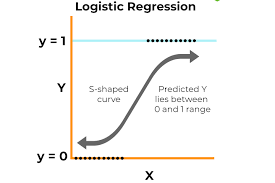

In [ ]:
# Create a model instance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Fit the model to the training data using the model’s fit method
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Execute prediction for the test dataset
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
# Display test dataframe
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
# Add the y_predict column into the test data
test['Survived'] = y_predict

In [ ]:
# Display top 20 rows of test data
test[:50]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0


### **Cross validation**
1. **Logistic Regression**: This is a type of statistical model used for predicting a
categorical outcome (like survival in your Titanic dataset). It works by estimating the probability of the outcome belonging to a particular category.

2. **Cross-Validation (CV)**: This is a technique to evaluate the performance of a model. It involves splitting the data into multiple folds and training the model on a subset of the data while testing it on the remaining data. This process is repeated for different folds to ensure a more robust performance evaluation.

3. **Regularization Parameter (C)**: This controls the complexity of the model. It is used to prevent overfitting, which occurs when a model performs well on training data but poorly on unseen data. The parameter C in LogisticRegressionCV is used for tuning the regularization strength.

4. **Cs = 10**: This means that the model will try 10 different values for the regularization parameter C (specifically, it will try 10 values spaced evenly on a logarithmic scale). The cross-validation procedure will then select the value of C that provides the best performance on average across the folds.



### **Concept of Cs**
- Think of it like **trying on ten different pairs of shoes** to find the best fit.
- Each **pair of shoes** represents a **different Cs value**.
- Cross-validation helps us **"walk around" in each pair** (**evaluate the model**) to see how comfortable they are (how well the model performs).
- We then choose the **pair that feels the best (the optimal Cs value)** for our overall journey (**making predictions on unseen data**).

# split the data in 80:20 (80% percent for training, 20% for testing) -> one time model generation -> may have overfitting issue

* so to deal with this:

    - we will do cross-validation on the train dataset
    
    - 80% -> randonly leave 10% data out, and train for the remaing 70% data
    
    - repeated for 10 times
    
    - get the mean value out of it


In [ ]:
# another example using cross validation
# to avoid overfitting
from sklearn.linear_model import LogisticRegressionCV
model_CV = LogisticRegressionCV(Cs = 10)
model_CV.fit(X_train, y_train)

LogisticRegressionCV()

In [ ]:
# Predict using the test dataset
y_CV_predict = model_CV.predict(X_test)

print("with cross validation: " + str(y_CV_predict[:50]))
print("no cross validation  : " + str(y_predict[:50]))

with cross validation: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1]
no cross validation  : [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0]


# **That's all for the day!!!**
# **See you all next week**